In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('quality_test.csv', names=['t1', 't2', 'pass'])

In [4]:
f = df.drop('pass', axis = 1)

In [5]:
# Our multiplications will be like:
# test_1^2, test_1.test_2, test_2^2
# test_1^3, test_1.test_1.test_2, test_1.test_2.test_2, test_2^3
# test_1^4, test_1.test_1.test_1.test_2, test_1.test_1.test_2.test_2, test_1.col_3.test_2.test_2, test_2^4
# And so on...

# Two for loops, 2...6, and on counting from 0 to i (or reverse)

degree = 6

for d in range(2, degree + 1):
    for i in range(d, -1, -1):
        f[f't1^{i}-t2^{d-i}'] = (f['t1'] ** d) * (f['t1'] ** (d-i))

In [6]:
f

,t1,t2,t1^2-t2^0,t1^1-t2^1,t1^0-t2^2,t1^3-t2^0,t1^2-t2^1,t1^1-t2^2,t1^0-t2^3,t1^4-t2^0,...,t1^2-t2^3,t1^1-t2^4,t1^0-t2^5,t1^6-t2^0,t1^5-t2^1,t1^4-t2^2,t1^3-t2^3,t1^2-t2^4,t1^1-t2^5,t1^0-t2^6
0,0.051267,0.699560,0.002628,1.347453e-04,6.907989e-06,1.347453e-04,6.907989e-06,3.541519e-07,1.815630e-08,6.907989e-06,...,4.772031e-11,2.446477e-12,1.254235e-13,1.815630e-08,9.308192e-10,4.772031e-11,2.446477e-12,1.254235e-13,6.430088e-15,3.296513e-16
1,-0.092742,0.684940,0.008601,-7.976812e-04,7.397855e-05,-7.976812e-04,7.397855e-05,-6.860919e-06,6.362953e-07,7.397855e-05,...,5.472826e-09,-5.075608e-10,4.707221e-11,6.362953e-07,-5.901130e-08,5.472826e-09,-5.075608e-10,4.707221e-11,-4.365571e-12,4.048718e-13
2,-0.213710,0.692250,0.045672,-9.760555e-03,2.085928e-03,-9.760555e-03,2.085928e-03,-4.457837e-04,9.526844e-05,2.085928e-03,...,4.351097e-06,-9.298729e-07,1.987231e-07,9.526844e-05,-2.035982e-05,4.351097e-06,-9.298729e-07,1.987231e-07,-4.246912e-08,9.076076e-09
3,-0.375000,0.502190,0.140625,-5.273438e-02,1.977539e-02,-5.273438e-02,1.977539e-02,-7.415771e-03,2.780914e-03,1.977539e-02,...,3.910661e-04,-1.466498e-04,5.499367e-05,2.780914e-03,-1.042843e-03,3.910661e-04,-1.466498e-04,5.499367e-05,-2.062263e-05,7.733484e-06
4,-0.513250,0.465640,0.263426,-1.352032e-01,6.939303e-02,-1.352032e-01,6.939303e-02,-3.561597e-02,1.827990e-02,6.939303e-02,...,4.815392e-03,-2.471500e-03,1.268497e-03,1.827990e-02,-9.382157e-03,4.815392e-03,-2.471500e-03,1.268497e-03,-6.510563e-04,3.341546e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,-0.720620,0.538740,0.519293,-3.742131e-01,2.696654e-01,-3.742131e-01,2.696654e-01,-1.943263e-01,1.400354e-01,2.696654e-01,...,7.271943e-02,-5.240308e-02,3.776271e-02,1.400354e-01,-1.009123e-01,7.271943e-02,-5.240308e-02,3.776271e-02,-2.721256e-02,1.960992e-02
114,-0.593890,0.494880,0.352705,-2.094682e-01,1.244011e-01,-2.094682e-01,1.244011e-01,-7.388054e-02,4.387691e-02,1.244011e-01,...,1.547562e-02,-9.190817e-03,5.458334e-03,4.387691e-02,-2.605806e-02,1.547562e-02,-9.190817e-03,5.458334e-03,-3.241650e-03,1.925184e-03
115,-0.484450,0.999270,0.234692,-1.136964e-01,5.508024e-02,-1.136964e-01,5.508024e-02,-2.668362e-02,1.292688e-02,5.508024e-02,...,3.033833e-03,-1.469740e-03,7.120158e-04,1.292688e-02,-6.262428e-03,3.033833e-03,-1.469740e-03,7.120158e-04,-3.449360e-04,1.671043e-04
116,-0.006336,0.999270,0.000040,-2.544062e-07,1.612020e-09,-2.544062e-07,1.612020e-09,-1.021440e-11,6.472253e-14,1.612020e-09,...,2.598607e-18,-1.646582e-20,1.043340e-22,6.472253e-14,-4.101079e-16,2.598607e-18,-1.646582e-20,1.043340e-22,-6.611020e-25,4.189006e-27


In [8]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(f, df['pass'])

LogisticRegression()

In [32]:
clf.score(f[:], df['pass'][:])

0.6610169491525424

In [103]:
ref = LogisticRegression()
df_X = df.drop(['pass'], axis=1)
ref.fit(df_X, df['pass'])
ref.score(df_X[:], df['pass'][:])

0.5423728813559322

In [106]:
ref_pred = ref.predict(df_X)

Text(0.5, 1.0, 'Data plot')

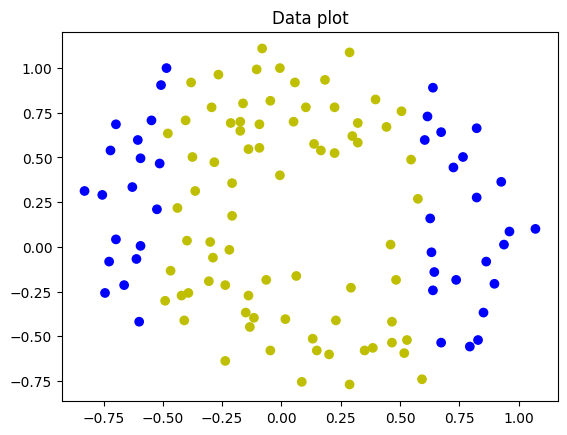

In [105]:
fig, ax = plt.subplots()
# ax.plot(df['pass'])
col = np.where(ppred<1,'b','y')
ax.scatter(f.iloc[:, 0], f.iloc[:, 1], c=col)
ax.set_title('Data plot')

In [104]:
ppred = clf.predict(f)

Text(0.5, 1.0, 'Data plot')

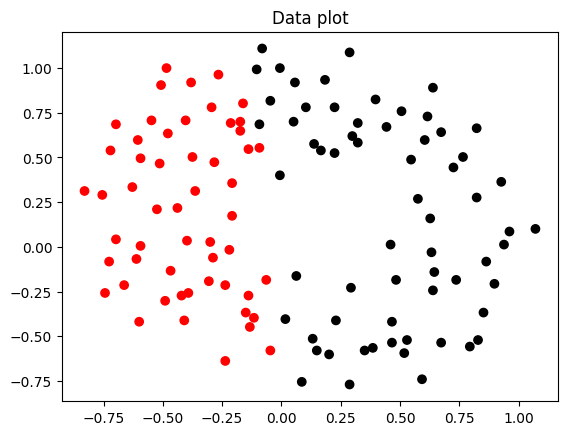

In [109]:
fig, ax = plt.subplots()
# ax.plot(df['pass'])
col = np.where(ref_pred<1,'k','r')
ax.scatter(f.iloc[:, 0], f.iloc[:, 1], c=col)
ax.set_title('Data plot')

In [ ]:
fig, ax = plt.subplots()
# ax.plot(df['pass'])
col = np.where(ppred<1,'b','y')
ax.scatter(f.iloc[:, 0], f.iloc[:, 1], c=col)
ax.set_title('Data plot')

In [62]:
x_min, x_max = f.iloc[:, 0].min() - 0.1, f.iloc[:, 0].max() + 0.1
y_min, y_max = f.iloc[:, 1].min() - 0.1, f.iloc[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

In [78]:
grid_points = np.c_[xx.ravel(), yy.ravel()]

In [79]:
grid_df = pd.DataFrame(grid_points, columns=['t1', 't2'])

degree = 6
for d in range(2, degree + 1):
    for i in range(d, -1, -1):
        grid_df[f't1^{i}-t2^{d-i}'] = (grid_df['t1'] ** d) * (grid_df['t2'] ** (d-i))
# grid_poly = poly.transform(grid_points)
grid_df

,t1,t2,t1^2-t2^0,t1^1-t2^1,t1^0-t2^2,t1^3-t2^0,t1^2-t2^1,t1^1-t2^2,t1^0-t2^3,t1^4-t2^0,...,t1^2-t2^3,t1^1-t2^4,t1^0-t2^5,t1^6-t2^0,t1^5-t2^1,t1^4-t2^2,t1^3-t2^3,t1^2-t2^4,t1^1-t2^5,t1^0-t2^6
0,-0.930070,-0.86974,0.865030,-0.752351,0.654350,-0.804539,0.699739,-0.608591,0.529316,0.748277,...,0.457875,-0.398232,0.346358,0.647282,-0.562967,0.489635,-0.425855,0.370383,-0.322137,0.280176
1,-0.919512,-0.86974,0.845503,-0.735368,0.639579,-0.777450,0.676180,-0.588101,0.511495,0.714875,...,0.432470,-0.376137,0.327141,0.604429,-0.525696,0.457219,-0.397662,0.345862,-0.300810,0.261627
2,-0.908955,-0.86974,0.826199,-0.718578,0.624976,-0.750977,0.653155,-0.568075,0.494078,0.682604,...,0.408206,-0.355033,0.308787,0.563967,-0.490504,0.426611,-0.371041,0.322709,-0.280673,0.244113
3,-0.898397,-0.86974,0.807117,-0.701982,0.610542,-0.725112,0.630659,-0.548509,0.477060,0.651438,...,0.385044,-0.334888,0.291265,0.525787,-0.457298,0.397730,-0.345922,0.300862,-0.261672,0.227587
4,-0.887839,-0.86974,0.788259,-0.685580,0.596277,-0.699847,0.608685,-0.529398,0.460439,0.621352,...,0.362945,-0.315668,0.274549,0.489786,-0.425987,0.370498,-0.322237,0.280262,-0.243755,0.212004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,1.128669,1.20890,1.273895,1.540011,1.861720,1.437806,1.738164,2.101266,2.540221,1.622808,...,3.235974,3.911969,4.729179,2.067286,2.499142,3.021213,3.652345,4.415319,5.337680,6.452721
39996,1.139227,1.20890,1.297838,1.568957,1.896712,1.478533,1.787398,2.160786,2.612174,1.684384,...,3.390179,4.098388,4.954541,2.186059,2.642726,3.194792,3.862184,4.668994,5.644347,6.823451
39997,1.149785,1.20890,1.322005,1.598172,1.932030,1.520021,1.837553,2.221418,2.685473,1.747697,...,3.550208,4.291847,5.188413,2.310464,2.793120,3.376603,4.081975,4.934700,5.965558,7.211763
39998,1.160342,1.20890,1.346394,1.627656,1.967674,1.562278,1.888638,2.283175,2.760130,1.812778,...,3.716224,4.492543,5.431035,2.440714,2.950579,3.566955,4.312092,5.212888,6.301860,7.618319


In [80]:
Z = clf.predict(grid_df)
Z = Z.reshape(xx.shape)

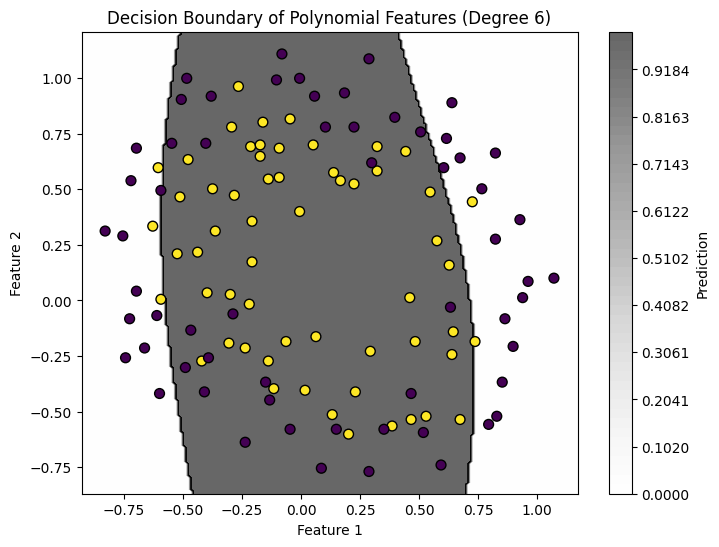

In [94]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 50), alpha=0.6, cmap="Greys")
plt.colorbar(label="Prediction")
plt.scatter(f.iloc[:, 0], f.iloc[:, 1], c=df['pass'], edgecolors='k', cmap="viridis", s=50)
plt.title("Decision Boundary of Polynomial Features (Degree 6)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()